In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulate data
np.random.seed(0)
n = 1000
df = pd.DataFrame({
    'interest_rate': np.random.normal(3.5, 0.5, n),
    'credit_score': np.random.normal(700, 50, n),
    'loan_term': np.random.choice([15, 30], size=n),
    'ltv': np.random.uniform(50, 100, n),
    'income': np.random.normal(75000, 15000, n),
})

# Prepayment logic (arbitrary for simulation)
df['prepaid'] = ((df['interest_rate'] > 3.6) & 
                 (df['credit_score'] > 680) & 
                 (df['ltv'] > 80)).astype(int)

In [3]:
X = df.drop('prepaid', axis=1)
y = df['prepaid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [4]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# AUC score
print(f"AUC: {roc_auc_score(y_test, y_prob):.3f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       277
           1       1.00      0.96      0.98        23

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300

AUC: 1.000


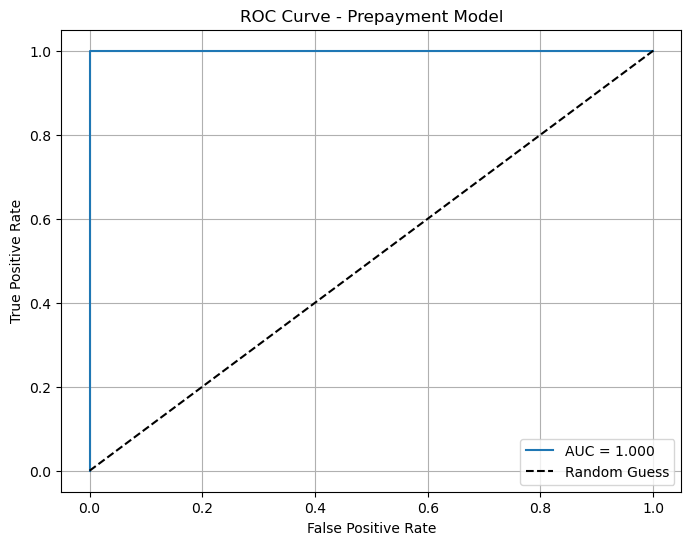

In [5]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Prepayment Model")
plt.legend()
plt.grid()
plt.show()

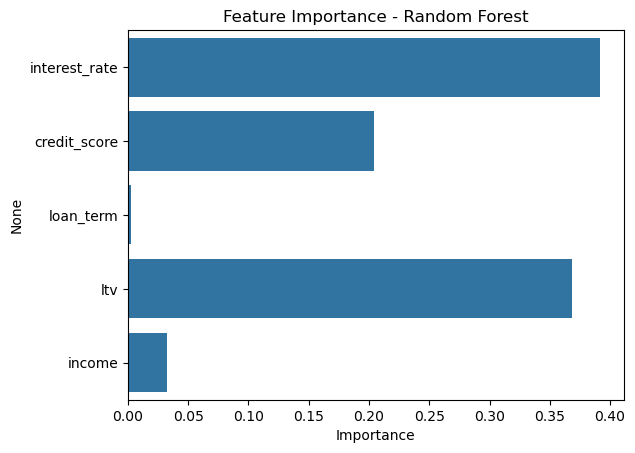

In [6]:
importances = model.feature_importances_
feat_names = X.columns

sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.show()